In [1]:
import os
import alpaca_trade_api as alpaca
import pandas as pd

In [2]:
api=alpaca.REST("PK45M02KPZJG46DHVZN8","0hjx1J7bEsIzREz72IbCpTOS5WSykCzp3JiJkKjs", "https://paper-api.alpaca.markets")

In [3]:
api.get_account()

Account({   'account_blocked': False,
    'account_number': 'PA3PWJTB1FOV',
    'accrued_fees': '0',
    'buying_power': '199823.68',
    'cash': '100000',
    'created_at': '2021-12-20T14:29:44.572667Z',
    'crypto_status': 'ACTIVE',
    'currency': 'USD',
    'daytrade_count': 0,
    'daytrading_buying_power': '0',
    'equity': '100000',
    'id': 'c219f7dd-731f-4e68-8844-906656d91d1a',
    'initial_margin': '88.16',
    'last_equity': '100000',
    'last_maintenance_margin': '0',
    'long_market_value': '0',
    'maintenance_margin': '0',
    'multiplier': '2',
    'non_marginable_buying_power': '99823.68',
    'pattern_day_trader': False,
    'pending_transfer_in': '0',
    'portfolio_value': '100000',
    'regt_buying_power': '199823.68',
    'short_market_value': '0',
    'shorting_enabled': True,
    'sma': '100000',
    'status': 'ACTIVE',
    'trade_suspended_by_user': False,
    'trading_blocked': False,
    'transfers_blocked': False})

In [4]:
import mpl_finance

C:\Users\klars\anaconda3\envs\tensorflow\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [5]:
import mplfinance as mpf

([<matplotlib.lines.Line2D object at 0x000001B5FFA1B2B0>, <matplotlib.lines.Line2D object at 0x000001B580112BE0>, <matplotlib.lines.Line2D object at 0x000001B580126220>, <matplotlib.lines.Line2D object at 0x000001B580126850>, <matplotlib.lines.Line2D object at 0x000001B580126E80>, <matplotlib.lines.Line2D object at 0x000001B5801344F0>, <matplotlib.lines.Line2D object at 0x000001B580134B20>, <matplotlib.lines.Line2D object at 0x000001B580143190>, <matplotlib.lines.Line2D object at 0x000001B5801437C0>, <matplotlib.lines.Line2D object at 0x000001B580143DF0>, <matplotlib.lines.Line2D object at 0x000001B580150460>, <matplotlib.lines.Line2D object at 0x000001B580150A90>, <matplotlib.lines.Line2D object at 0x000001B58015D100>, <matplotlib.lines.Line2D object at 0x000001B58015D730>, <matplotlib.lines.Line2D object at 0x000001B58015DD60>, <matplotlib.lines.Line2D object at 0x000001B58016A3D0>, <matplotlib.lines.Line2D object at 0x000001B58016AA00>, <matplotlib.lines.Line2D object at 0x000001B58

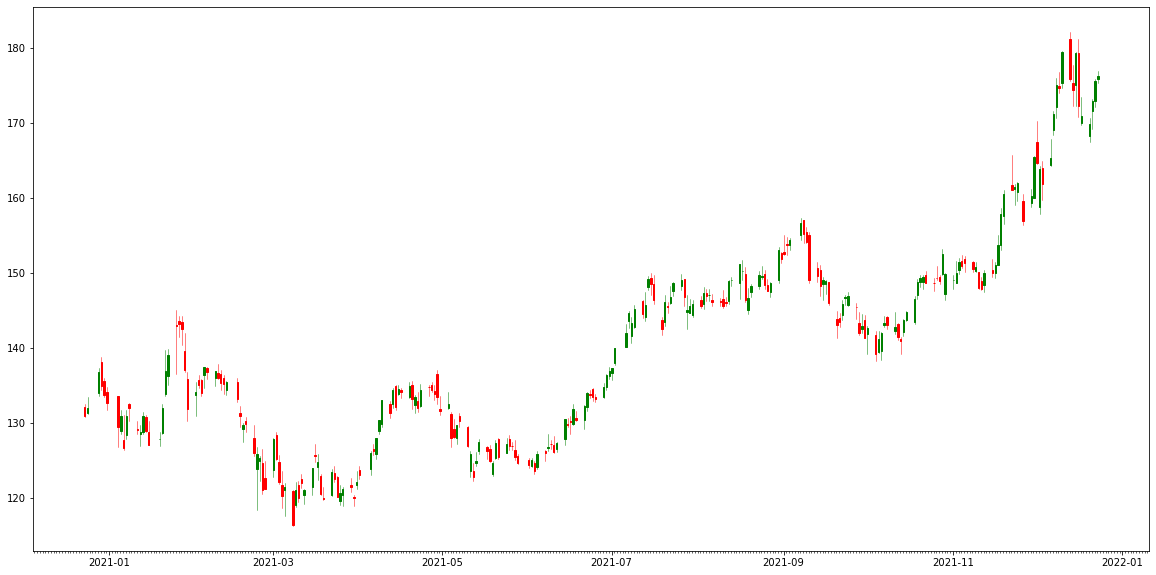

In [6]:
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator

df = api.get_barset('AAPL', 'day', limit=253).df['AAPL']
quotes = zip(mdates.date2num(df.index.to_pydatetime()),
df.open, df.high, df.low, df.close)

fig, ax = plt.subplots(figsize=(20,10))
ax.xaxis_date()
ax.autoscale_view()
alldays = DayLocator()
ax.xaxis.set_minor_locator(alldays)
print(candlestick_ohlc(ax, quotes, width=0.5, colorup='g', colordown='r'))



In [7]:
for i in range(0,21):
    df['SMA20Days']=df['close'].rolling(window=20).mean()
df['SMA20Days']
for i in range(0,51):
    df['SMA50Days']=df['close'].rolling(window=50).mean()

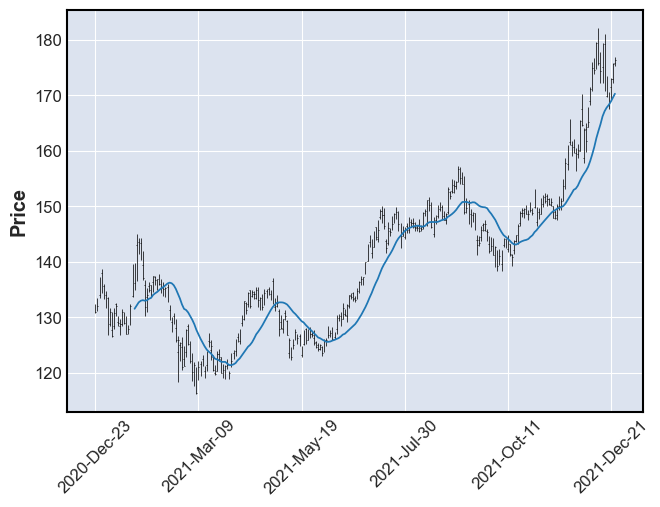

In [8]:
tcdf=df['SMA20Days']
apd=mpf.make_addplot(tcdf)
mpf.plot(df,addplot=apd)



In [14]:
tcdf2=df[['SMA20Days','SMA50Days']]
apd2=mpf.make_addplot(tcdf2)
fag=mpf.plot(df,addplot=apd2)

KeyError: "None of [Index(['SMA20Days', 'SMA50Days'], dtype='object')] are in the [columns]"

In [10]:
df.reset_index('time')

,time,open,high,low,close,volume,SMA20Days,SMA50Days
0,2020-12-23 00:00:00-05:00,132.16,132.4300,130.7800,130.96,76023894,NaN,NaN
1,2020-12-24 00:00:00-05:00,131.32,133.4600,131.1000,131.99,51675667,NaN,NaN
2,2020-12-28 00:00:00-05:00,133.99,137.3400,133.5100,136.73,116008068,NaN,NaN
3,2020-12-29 00:00:00-05:00,138.05,138.7890,134.3409,134.93,114407189,NaN,NaN
4,2020-12-30 00:00:00-05:00,135.58,135.9900,133.4000,133.72,87788124,NaN,NaN
...,...,...,...,...,...,...,...,...
248,2021-12-17 00:00:00-05:00,169.93,173.4700,169.6900,170.86,133930793,167.80275,156.34034
249,2021-12-20 00:00:00-05:00,168.28,170.5800,167.4600,169.88,88698282,168.26875,156.87774
250,2021-12-21 00:00:00-05:00,171.55,173.2000,169.1200,172.98,75820118,168.86375,157.48134
251,2021-12-22 00:00:00-05:00,172.93,175.8600,172.1500,175.63,75934321,169.57425,158.16474


In [11]:
df=pd.DataFrame()

In [ ]:
df['marker']=[]


In [ ]:
df['marker']

In [ ]:
if(df.iloc['SMA20Days']>df.iloc['SMA50Days']):
    df['marker']='^'
elif(df.iloc['SMA20Days']<df.iloc['SMA50Days']):
    df['marker']='v'

In [ ]:
print(df.iloc[0]['SMA20Days'])

In [12]:
def marker(x):
    x['marker']='v' if x['SMA20Days'] < x['SMA50Days'] else '^'
    return x
df=df.apply(lambda x:marker(x),axis=1)
df

""


In [ ]:
df.to_csv('sma.csv')